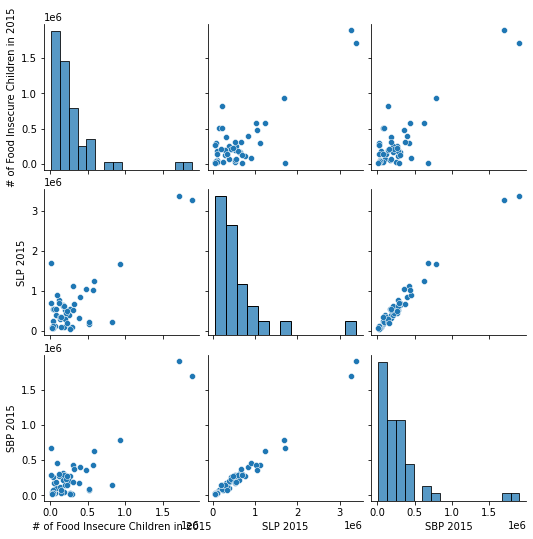

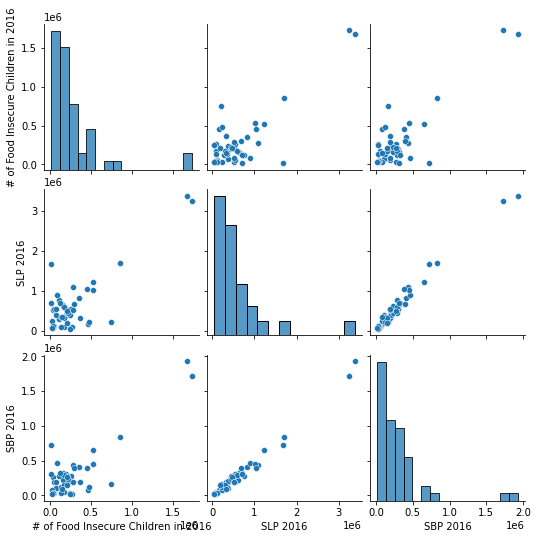

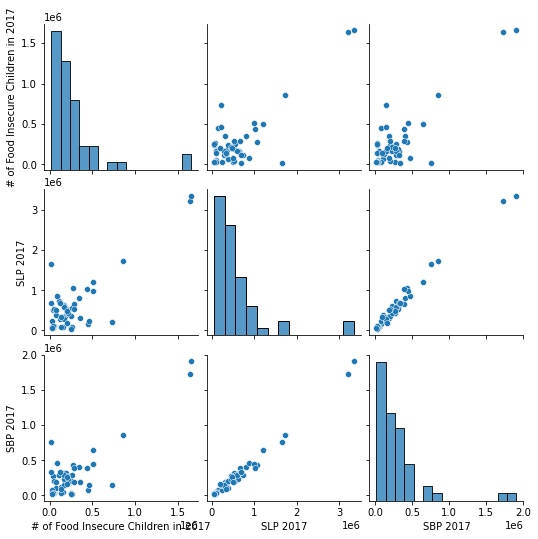

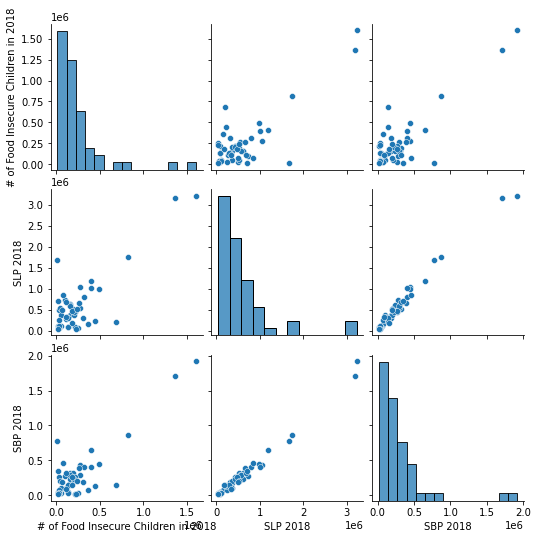

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
%matplotlib inline


frames = [pd.read_csv('https://raw.githubusercontent.com/nalam004/seniordesign/main/cfi_state.csv'), 
          pd.read_csv('https://raw.githubusercontent.com/nalam004/seniordesign/main/fsp.csv')]
df = pd.concat(frames, axis=1)

years = [2015, 2016, 2017, 2018]

# plots the number of food insecure children, school lunch participation, 
# and school breakfast participation correlation

for i in years: 
    sns.pairplot(df[['# of Food Insecure Children in ' + str(i), 'SLP ' + str(i), 'SBP ' + str(i)]])


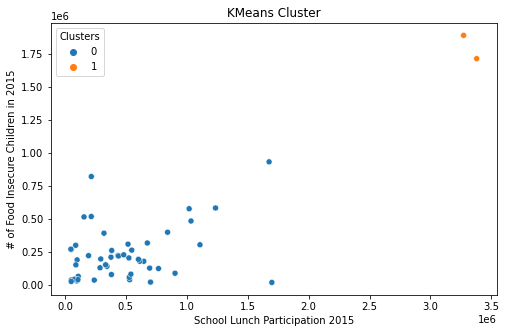

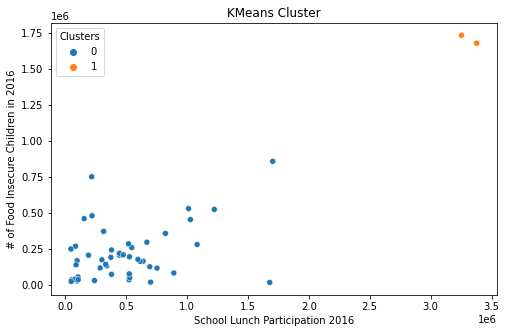

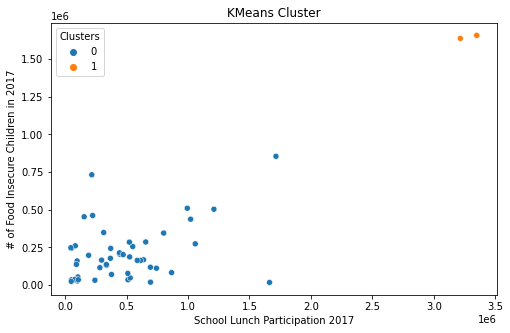

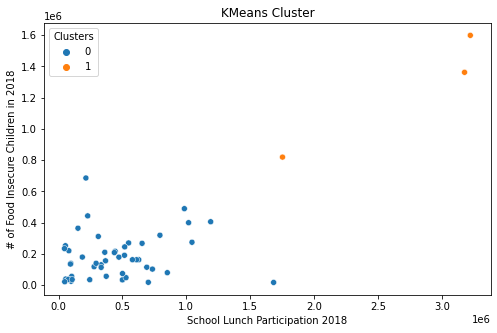

In [3]:
kmeans = cluster.KMeans(n_clusters=2, init='k-means++')

years = [2015, 2016, 2017, 2018]

for i in years:
    kmeans = kmeans.fit(df[['SLP ' + str(i), '# of Food Insecure Children in ' + str(i)]])
    kmeans.cluster_centers_
    df['Clusters'] = kmeans.labels_

    plt.figure(figsize=(8,5))
    sns.scatterplot(x='SLP ' + str(i), y='# of Food Insecure Children in ' + str(i), hue='Clusters', data=df)
    plt.title('KMeans Cluster') #title
    plt.xlabel('School Lunch Participation ' + str(i)) 
    plt.ylabel('# of Food Insecure Children in ' + str(i)) 
    plt.show()

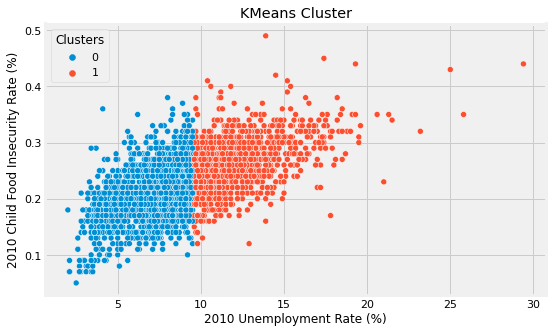

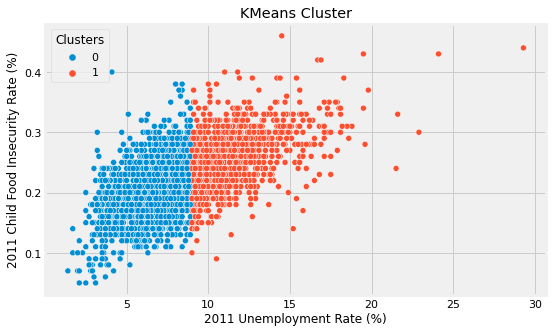

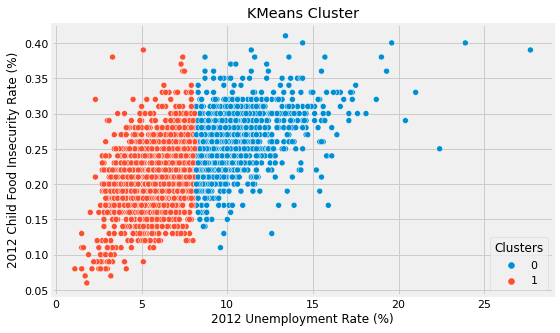

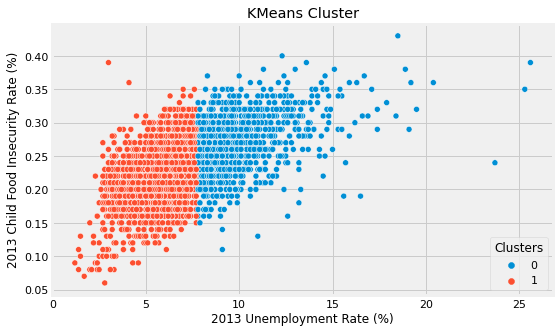

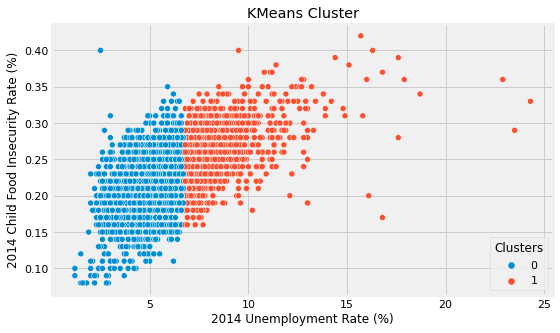

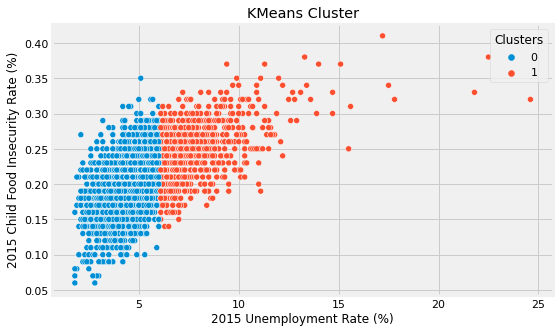

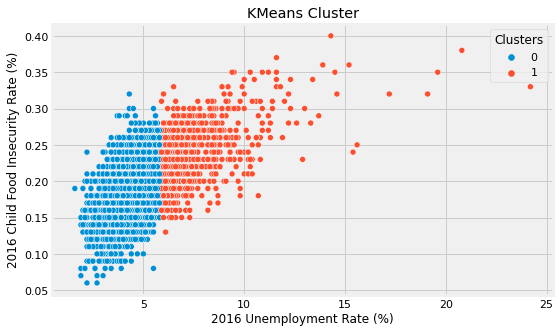

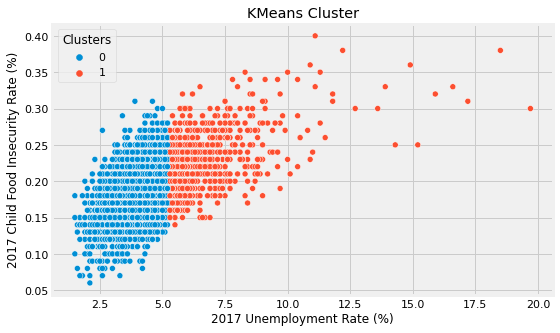

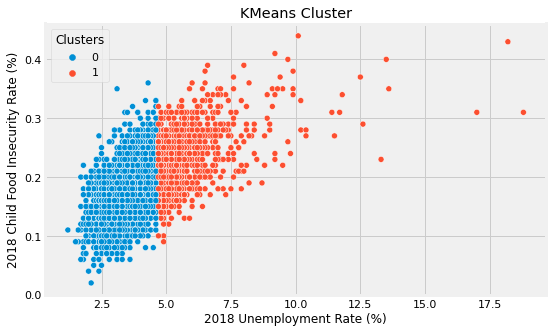

In [29]:
frames = [pd.read_csv('https://raw.githubusercontent.com/nalam004/seniordesign/main/cfi_county.csv'), 
          pd.read_csv('https://raw.githubusercontent.com/nalam004/seniordesign/main/unemployment.csv')]
df = pd.concat(frames, axis=1)

years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

for i in years:
    
    # need to multiply food insecurity rate by 100 since it is percentage rate 
    kmeans = kmeans.fit(df[[str(i) + ' Unemployment Rate (%)', str(i) + ' Child Food Insecurity Rate']])
    kmeans.cluster_centers_
    df['Clusters'] = kmeans.labels_

    plt.figure(figsize=(8,5))
    sns.scatterplot(x=str(i) + ' Unemployment Rate (%)', y=str(i) + ' Child Food Insecurity Rate', 
                    hue='Clusters', data=df)
    plt.title('KMeans Cluster') 
    plt.xlabel(str(i) + ' Unemployment Rate (%)') 
    plt.ylabel(str(i) + ' Child Food Insecurity Rate (%)') 
    plt.show()